# Assignment 7: Mathematical modelling - model estimation
This assignment introduces you to the estimation of parameters through the minimization of a loss function. We are doing this in the context of linear regression. You will learn to plot the relationship between 2 variables, write a function that makes the model prediction, write a function that calculates the loss function, and how to estimate the parameters of the model. While there are many libraries that implement simple regression, you are learning here a universal way that is applicable to ANY mathematical model. 

The data set possum.csv is a sample of 46 possums that were caught in Victoria (NZ) in a field study. 
- age:  Age (years).
- headL:  Head length, in mm.
- skullW:  Skull width, in mm.
- totalL:  Total length, in cm.
- tailL:  Tail length, in cm.


## Preliminaries

In [56]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.optimize as so
import pandas as pd 
import numpy as np
import seaborn as sns

In [57]:
df = pd.read_csv('possum.csv')
df.head()

,sex,age,headL,skullW,totalL,tailL
0,m,8,94.1,60.4,89.0,36.0
1,f,6,92.5,57.6,91.5,36.5
2,f,6,94.0,60.0,95.5,39.0
3,f,6,93.2,57.1,92.0,38.0
4,f,2,91.5,56.3,85.5,36.0


## Task 1: Scatterplots
### Question 1
Make a scatter plot between age and head size. Make sure to label your x-axis and y-axis. Written answer: is there a relationship between the two variables? How would you describe it qualitatively (is the relationship positive or negative, is it linear, etc)? 

<AxesSubplot:xlabel='age', ylabel='headL'>

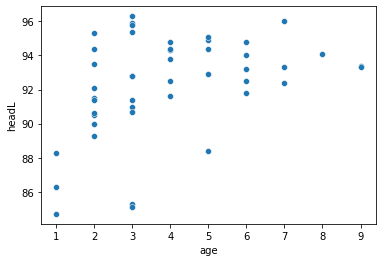

In [58]:
sns.scatterplot(x = "age", y = "headL", data = df)

The plot isnt very linear, and it seems to be positive, but not definitively.

### Question 2. 
Make a scatter plot between head size and skull width. Written answer: is there a relationship between the two variables? How would you describe it qualitatively? Are there unusual data points (i.e. outliers) in the data set? What may be a possible explanation?    

<AxesSubplot:xlabel='headL', ylabel='skullW'>

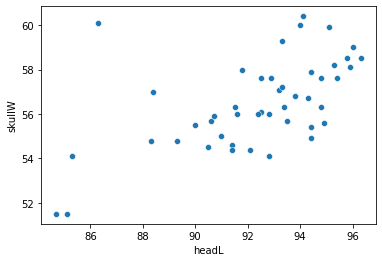

In [59]:
sns.scatterplot(x = "headL", y = "skullW", data = df)

There seems to be a solid positive linear relationship. This relationship seems to be: as the head length increases, the skull width increases. There seems to be an outlier where head length is around 86mm and skull width is about 60mm.

## Task 2 Fit a linear regression line "by hand"
### Question 1
Write a function simpleRegPredict(b,x) that takes as an input b a list of two parameter [intercept,slope] and as x values of an x-variable. The function should then return the predicted values for y following the linear model (see lecture). Call the function using b=[83,2] as parameters and to predict the value for x=2. 


In [60]:
def simpleRegPredict(b,x):
    """
    b = [b0,b1] (list) contains model parameters
    x (np.ndarray): regressor
    """
    y_pred = b[0] + b[1]*x
    return y_pred

simpleRegPredict([83,2],2)

87

### Question 2
Write a function plotPrediction(b,x,y,fcn=simpleRegPredict) that makes a scatter plot of the x vs. the y-variable and then plots a regression line into the plot (see lecture / lab for hints). Call the function for x being the age, y=headL, and b=[83,2].

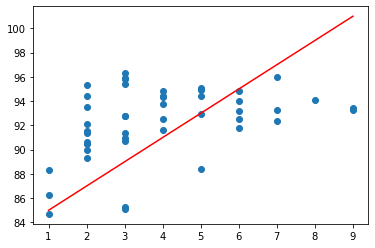

In [61]:
def plotPrediction(b,x,y,predictFcn=simpleRegPredict):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x,y)
    xp = np.linspace(min(x),max(x),num=50)
    yp = predictFcn(b,xp)
    ax.plot(xp,yp,'r')

plotPrediction([83,2],df["age"],df["headL"])

### Question 3
Write a loss function simpleRegLossRSS(b,x,y) that takes as the inputs the parameters (b), the explanatory (x) and the response variable (y) and then calculates and returns the residual sum-of-squares of the linear fit. It also should return the derivate of the Loss function in respect to the two parameters (see lecture / lab). The function should use your function simpleRegPred. Call the function with b=[83,2] as parameters, x=age and y= headL. What is the residual sum of squares? What is the derivative? In order to minimize the Loss, would you need to increase or decrease the slope/intercept? 

In [62]:
def simpleRegLossRSS(b,x,y):
    predY = simpleRegPredict(b,x)
    res = y-predY
    rss = sum(res**2)
    deriv = np.zeros(2)
    deriv[0]=-2*sum(res)
    deriv[1]=-2*sum(res*x)
    return (rss,deriv)

simpleRegLossRSS([83,2],df["age"],df["headL"])

(818.3900000000001, array([-128.6,   54.2]))

the residual sum of squares is ~ 818.39, and the derivative with respect to the intercept is -128.6, and the derivative with respect to the slope is 54.2. In order to minimize the loss, need to increase the intercept and decrease the slope. 

### Question 4
First try to reduce the slope value and try parameter values b=[83,0.6]. Then increase the intercept and try b=[89,0.6]. For each value make the prediction plot and report the residual-sum-of squares using your functions from question 2 and 3. Which fit provides the lowest loss (rss)? How do the derivatives change for each value? And according to the derivative, which direction should you change the parameters? Play around with other parameter settings. Can you find one that gives you a loss below rss=350? 

In [63]:
simpleRegLossRSS([83,0.6],df["age"],df["headL"])

(2537.8700000000003, array([ -638.2, -2510.6]))

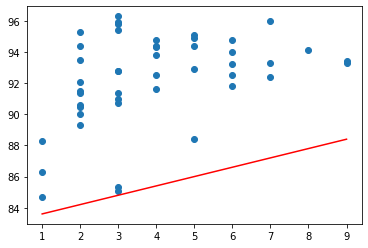

In [64]:
plotPrediction([83,0.6],df["age"],df["headL"])

In [65]:
simpleRegLossRSS([89,0.6],df["age"],df["headL"])

(364.66999999999985, array([ -86.2, -326.6]))

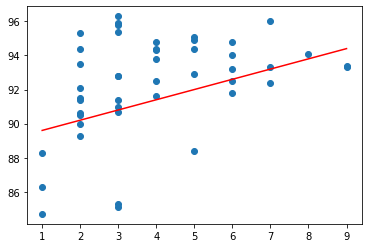

In [66]:
plotPrediction([89,0.6],df["age"],df["headL"])

the second parameter values b=[89,0.6] provided the lowest rss. As the derivative of the intercept increased to 89, both values grew closer to 0. We should slightly increase the intercept derivative, and we should set the slope derivative closer to 1. 

In [67]:
simpleRegLossRSS([90,0.55],df["age"],df["headL"])

(324.89000000000016, array([-12.4, -54.2]))

## Task 3: Fit the linear model using scipy.optimize.minimize
### Question 1
Use scipy.optimize.minimize to minimize the function value of simpleRegLossRSS(b,x,y) from task 2, question 2. As starting values simply give b0=[0,0]
Show the result structure. Written answer: What is the estimated parameter value for intercept and slope and what is the best achieved rss? 

In [68]:
loss_func = simpleRegLossRSS
RESULT = so.minimize(loss_func, [0,0], args = (df["age"],df["headL"]), jac = True) #first input is the function, second is the initializing, third is the simple loss args, fourth is jaconian 
b_opt = RESULT.x
fun = RESULT.fun
print("the estimated paramater value for intercept and slope is:", b_opt)
print("the best achieved rss is:", fun)

the estimated paramater value for intercept and slope is: [90.08288948  0.56311585]
the best achieved rss is: 324.02064580559255


### Question 2
Use your function plotPrediction (from above) to plot this best linear fit between age and head length. 

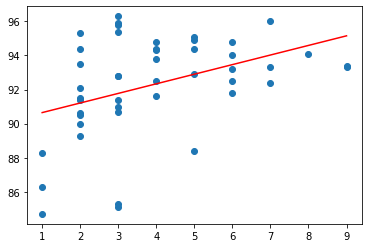

In [69]:
plotPrediction(b_opt,df["age"],df["headL"])

### Question 3
Calculate the total sum-of-squares by subtracting the mean from all the y-values, squaring the result and finally summing them up. What is the total sum of squares for headL? 

In [70]:
TSS = sum((df["headL"] - np.mean(df["headL"]))**2)
print(TSS)

386.1445652173914


### Question 4
Write a function simpleRegFit(x,y) that (a) estimates the parameters as done in Question 3.1, (b) plots the predictions as done in 3.2 and (c) calculates (and returns) R2 of the fit.  Call the function with x=age and y=headL.  Written answer: What is the R2 of the fit? How can you interpret it? 

the estimated paramater value for intercept and slope is: [90.08288948  0.56311585]
the R2 of the fit is: 0.16088254246650957


0.16088254246650957

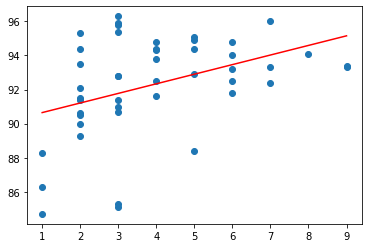

In [71]:
def simpleRegFit(x,y):
    """
    a - estimates the paramater
    b - plots the predictions
    c - calculates + returns R2
    """
    #a
    RESULT = so.minimize(loss_func, [0,0], args = (df[x],df[y]), jac = True) #first input is the function, second is the initializing, third is the simple loss args, fourth is jaconian 
    a = RESULT.x
    print("the estimated paramater value for intercept and slope is:", a)
    #b
    plotPrediction(b_opt,df[x],df[y])
    #c
    ##rss
    RSS = RESULT.fun
    ##tss
    TSS = sum((df[y] - np.mean(df[y]))**2)
    ##R2
    R2 = 1 - (RSS/TSS)
    print("the R2 of the fit is:", R2)
    return R2
    
    
simpleRegFit(x = "age", y = "headL")

to interpret the R2, we have to understand that it is just the ratio of residual sum of squares and total sum of squares, and a value closer to 1 indicates a strong fit, and a value closer to 0 indicates weak fit. Therefore in this circumstance, the R2 is close to 0, indicating a weak fit, meaning that the values are not closely related. 

### Question 5
Fit a linear model between age (x) and tail length (y). How good is the fit? Are there outliers? How much would the slope of the line change if you excluded the outlier?  

the estimated paramater value for intercept and slope is: [33.35046603  0.75372837]
the R2 of the fit is: 0.22286587947604086


0.22286587947604086

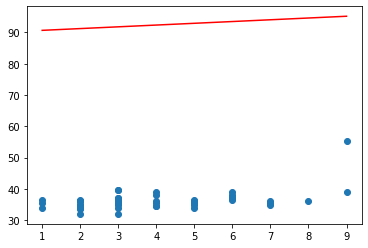

In [72]:
simpleRegFit(x = "age", y = "tailL")

there are many outliers, as the regression line is way above the cluster of points at the bottom. Excluding the outlier, the line would change durastically and shift to the bottom. 